# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [8]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [9]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [10]:
df.shape

(1898, 9)

#### Observations:
I can see from the shape that the table has 1898 rows and 9 columns.


### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)


In [11]:
# Prints a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [12]:
# Coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df['restaurant_name'] = df['restaurant_name'].astype('category')     
df['cuisine_type'] = df['cuisine_type'].astype('category')          
df['day_of_the_week'] = df['day_of_the_week'].astype('category')
#df['rating'] = df['rating'].astype('category')
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


**Observations:**
* I can now see that the restaurant_name, cuisine_name and day_of_the_week colums have been successfully converted to categories 
* I have also converted the rating column as its an object type but if there are only 5 rating then it could also benefit from being converted to a category type as well.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [13]:
df.describe(include = 'all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


**Observation:**
* There are 1898 orders. 
* On average an order takes 27 minutes to be prepared and 24 minutes to deliver totalling approximately an hour waiting time
* 50% of orders will typically be delivered within this timeframe an hour.
* Shake Schack is the resturant with the highest number of orders
* American cuisine is the most popular cuisine with the highest number of orders
* Most orders are made on a weekend
* Most orders do not have a rating.
* An individual oder cost 16.5 dollars on average but can cost up to 35 dollars.

### **Question 5:** How many orders are not rated? (0.5 mark)

In [14]:
#Printing number of count of the rating column
print(df['rating'].value_counts())

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


**Observations:**
* 736 values in the ratings column have not been given which indicate that 736 orders were not rated.
* 5 is the most popular rating given by customers and 3 is the least so customers are generally satisfied overall

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

In [15]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Order ID

In [16]:
df['order_id'].value_counts().shape

(1898,)

### Observations on Customer ID

In [17]:
df['customer_id'].value_counts().unique

<bound method Series.unique of 52832     13
47440     10
83287      9
250494     8
65009      7
          ..
66393      1
142170     1
332635     1
147519     1
385023     1
Name: customer_id, Length: 1200, dtype: int64>

In [18]:
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
65009      7
Name: customer_id, dtype: int64

**Observations:**
* There are 1898 unique orders and 1200 unique customers in this dataframe and some customers have made multiple orders


### Observations on Restaurant Name

In [19]:
df['restaurant_name'].value_counts().unique

<bound method Series.unique of Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64>

**Observations:**
* There are 178 unique resturants
* The  Shake Shack is the most popular restaurant followed by Meatball Shop and Blue Ribbon Sushi respectively


### Observations on Food Preperation Time

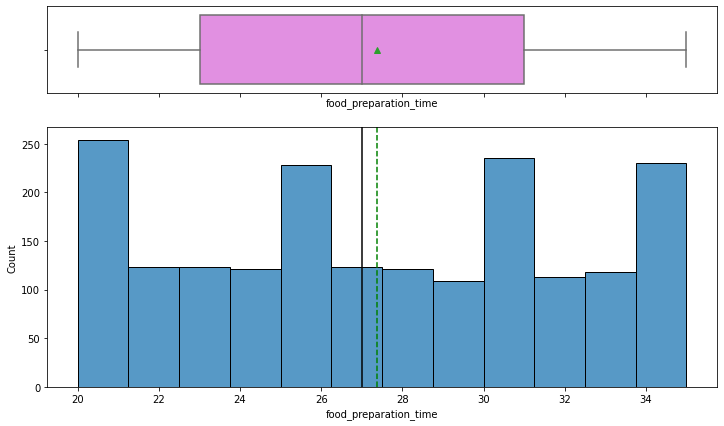

In [22]:
histogram_boxplot(df, 'food_preparation_time')

**Observations:**
* Food typically takes between 20 and 36 minutes for to be prepared
* There are no outliers in this data
* We need to understand how food preperation time is impacted by the type of cuisine type and day of the week
* We also need to understand weather food preperation time alligns with customer ratings


### Observations on Delivery Time

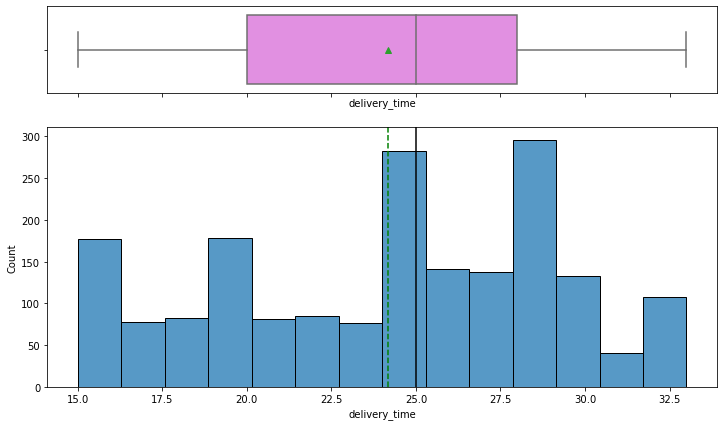

In [23]:
histogram_boxplot(df, 'delivery_time')

**Observations:**
* Food typically takes between 15 and 34 minutes for to be delivered
* This histogram is left-skewed but there are no outliers in this data
* We need to understand how food delivery time is impacted by the day of the week
* We also need to understand weather food delivery time alligns with customer ratings



### Observations on Cost of Order

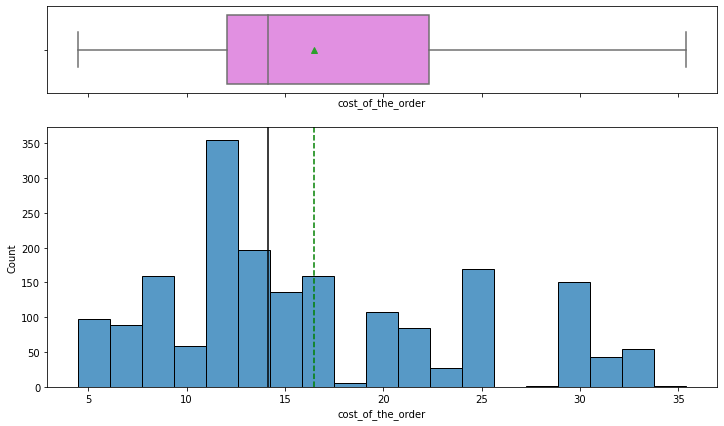

In [24]:
histogram_boxplot(df, 'cost_of_the_order')

**Observations:**

* An order can cost anything from 4 to 34 dollars but a bulk of orders fall between 11 and 17 dollar mark
* This histogram is right-skewed but there are no outliers in this data
* We need to understand how food delivery time is impacted by the day of the week
* We also need to understand weather food delivery time alligns with customer ratings



### Let's also explore the categorical variables

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Cuisine Type

<Figure size 720x504 with 0 Axes>

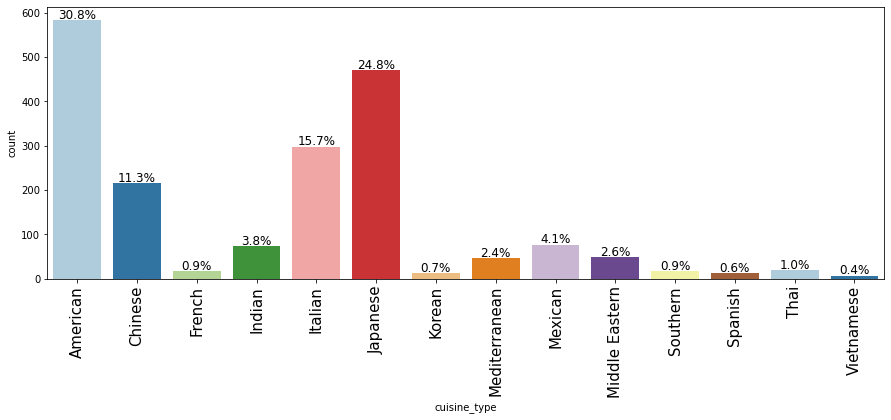

In [26]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'cuisine_type', perc=True)

**Observations:**
* American cuisine apperas to be the most popular with 30.8 percent of the orders followed by Japanese cuisine at 24.8 percent
* American, Chinese, Italian and Japanese cuisines contribute to about 80 percent of all orders 



### Observations on Day of The Week

<Figure size 720x504 with 0 Axes>

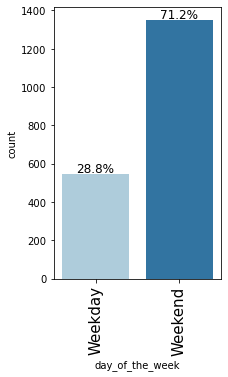

In [27]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'day_of_the_week', perc=True)

**Observations:**
* 71.2 percent of the period we are analysing are weekends while only 28.8 are weekdays
* This tells me that most customers prefer to order food on weekends

### Observations on Ratings

<Figure size 720x504 with 0 Axes>

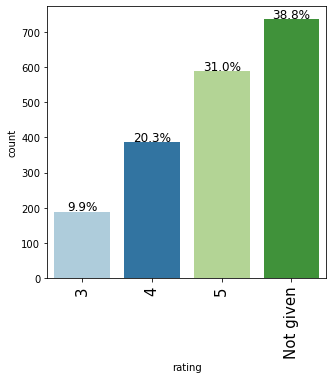

In [28]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'rating', perc=True)

**Observations:**
* 38.8 percent of customers have not given a rating for their order
* 5 is the most popular customer rating and 3 is the least popular customer rating

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [29]:
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

**Observations:**
* Shake Shack has by far the highest number of orders with 219 orders followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Rice and Parm
* Would be interesting to know the cuisine served by these 5 resturants


### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [30]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head()

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

**Observations:**
* Again this aligns with our previous observation that American, Japanes, Italian and Chines cuisine are the most popular
* The above 5 cuisines are particularly more popular on weekends

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [31]:
df_aboveTwenty = df[df['cost_of_the_order'] > 20]
perc = (df_aboveTwenty.value_counts().sum()/df['cost_of_the_order'].value_counts().sum()) * 100
print("Percentage of orders above 20 dollars:", round(perc, 2), '%')

Percentage of orders above 20 dollars: 29.24 %


**Observations:**
* Orders costing above 20 dollars make up about 29% of total orders.

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [33]:
mean_del_tm = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_del_tm, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


**Observations:**
* Food will typically be delivered to the customer within 24 minutes once ready

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [34]:
df[df['cost_of_the_order'] == df['cost_of_the_order'].max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


**Observations:**
* The customer with Customer ID 62359 will qualify for this free coupon for spending 35.41 dollars which is the highest amout spent by any customer so far.

### Bivariate Analysis

### Question 12: Perform bivariate analysis to explore relationships between the important variables in the dataset. (7 marks)


### Cuisine vs Food Preparation time

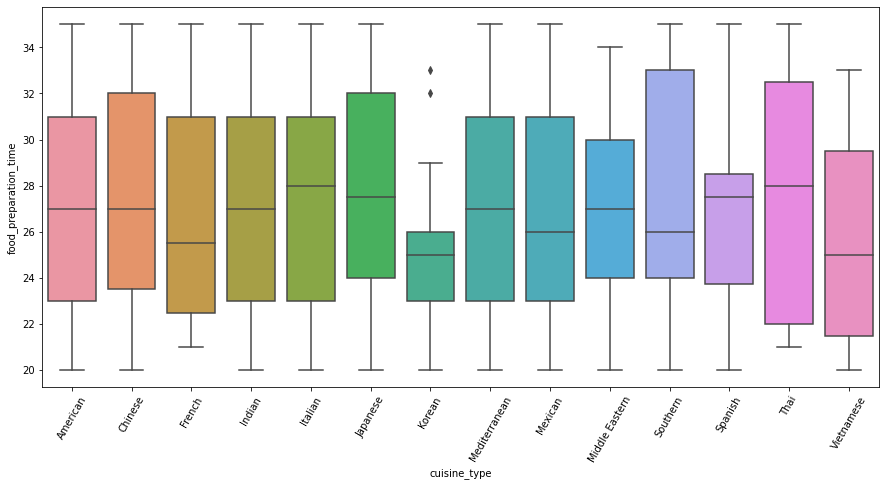

In [35]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data = df)
plt.xticks(rotation = 60)
plt.show()

**Observations:**
* Thai and Italian food take on average the longest time to prepare
* Korean and Vietnamese food take the least time to prepare
* There are outliers for Korean food so some specific dishes might take a long time on average to prepare
* American, Chinese, Indian and Middle Eastern food take on average similar time to prepare

### Cuisine vs Cost of Order

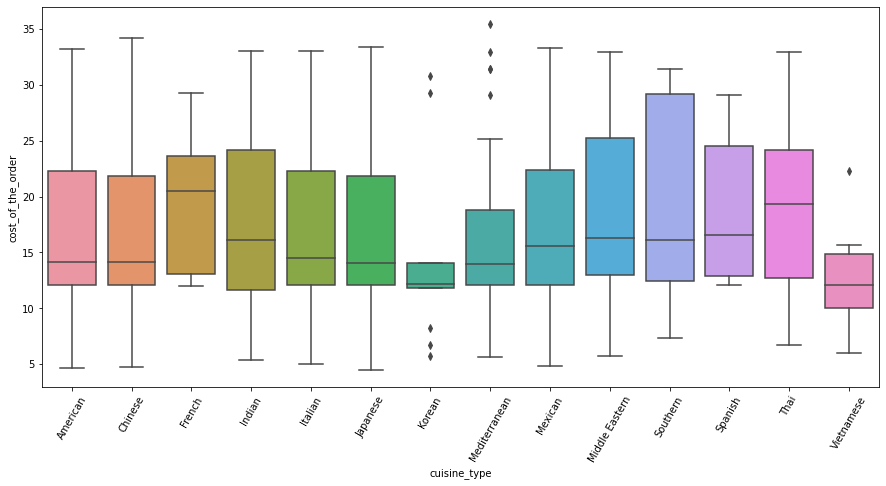

In [36]:
# Relationship between cost of order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data = df)
plt.xticks(rotation = 60)
plt.show()

**Observations:**

* French food is the most expensive to order on average
* Vietnamese food and Korean food are the cheapest to order on average
* Korean food has outliers so some special dishes might be much more expensive or much cheaper to order
* American, Chinese and Japanese food cost similar amounts to order



### Ratings vs Food Preparation time

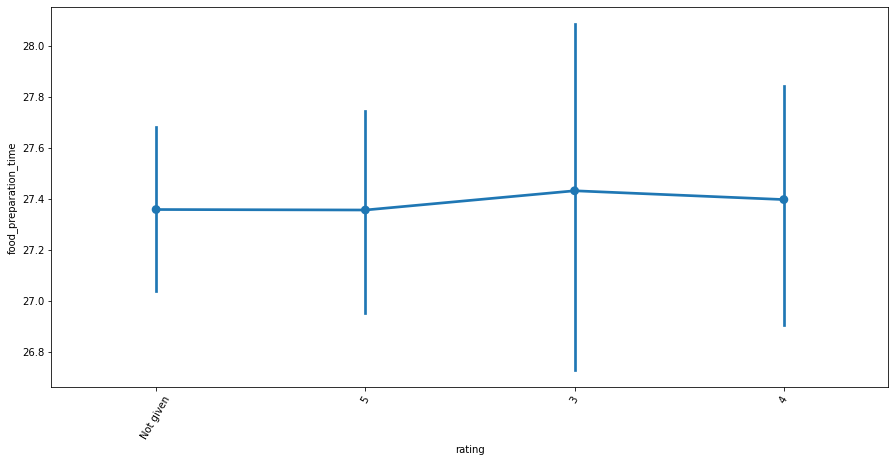

In [37]:
# Relationship between food preparation time and Ratings
plt.figure(figsize=(15,7))
sns.pointplot(x='rating', y='food_preparation_time', data = df)
plt.xticks(rotation = 60)
plt.show()

**Observations:**
* The highest food preperation times are linked to the lowest rating which is 3
* The lowest food preperation times are linked to the higest rating which is 5



### Ratings vs Cost of Order

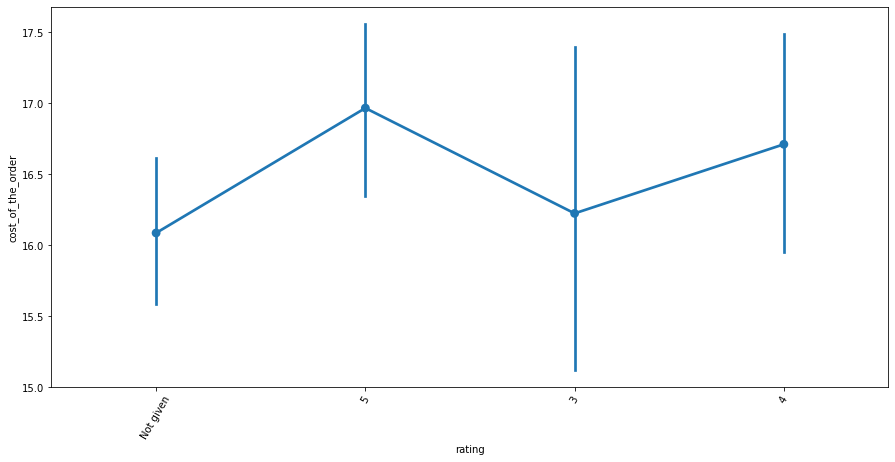

In [38]:
# Relationship between the Cost of order and rating
plt.figure(figsize=(15,7))
sns.pointplot(x='rating', y='cost_of_the_order', data = df)
plt.xticks(rotation = 60)
plt.show()

**Observations:**

* The highest cost cost of order is linked to the highest rating which is 5
* The lowest cost cost of order is linked to either a low rating of 3 or no rating being given by the customer at all


### Ratings vs Delivery Time

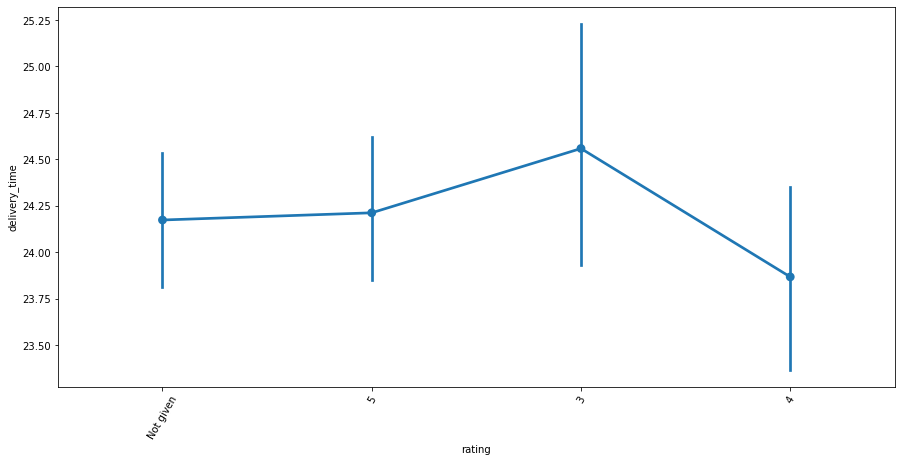

In [39]:
# Relationship between the Delivery Time and rating
plt.figure(figsize=(15,7))
sns.pointplot(x='rating', y='delivery_time', data = df)
plt.xticks(rotation = 60)
plt.show()

**Observations:**

* The highest delivery times are linked to the lowest rating which is 3
* The lowest food preperation times are linked to either no ratings at all or customers giving the highest rating which is 5

### Day of the Week vs Delivery time

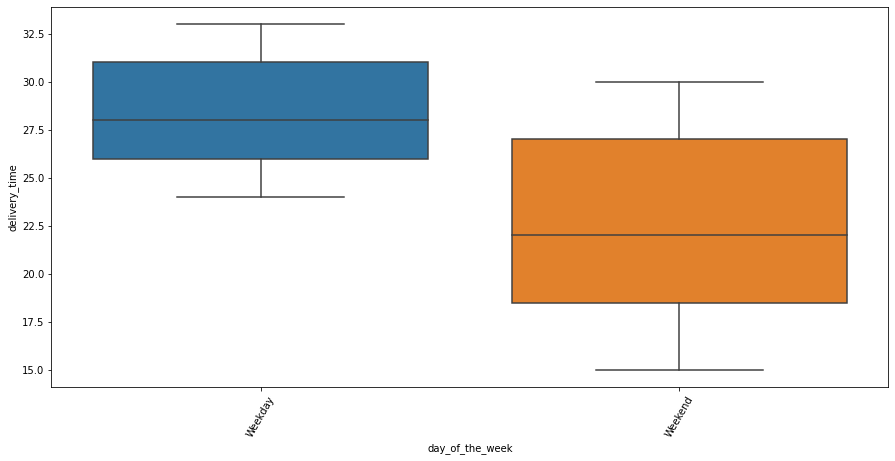

In [40]:
# Relationship between cost of order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data = df)
plt.xticks(rotation = 60)
plt.show()

**Observations:**

* The delivery time is generally higher on weekdays than on weekends
* It take 28 minutes on average to deliver food to a customer on weekdays and 22 minutes on weekends


### Day of the Week vs Food Preperation time

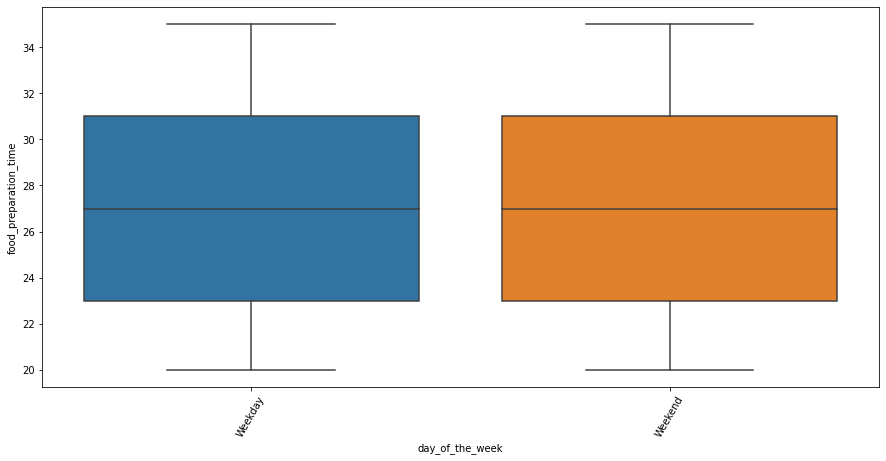

In [41]:
# Relationship between cost of order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data = df)
plt.xticks(rotation = 60)
plt.show()

**Observations:**

* Food preperation time remains unaffected by the day of the week


### Revenue Generation by Restaurants

In [42]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

**Observations:**

* Shake Shack has generated the highest revenue of all the 14 restaurants at 3579.53 dollars followed by the Meatball Shop at 2145.21 dollars
* Five Guys Burgers and Fries generated the least revenue at just 506.47 dollars


### Correlation between Variables

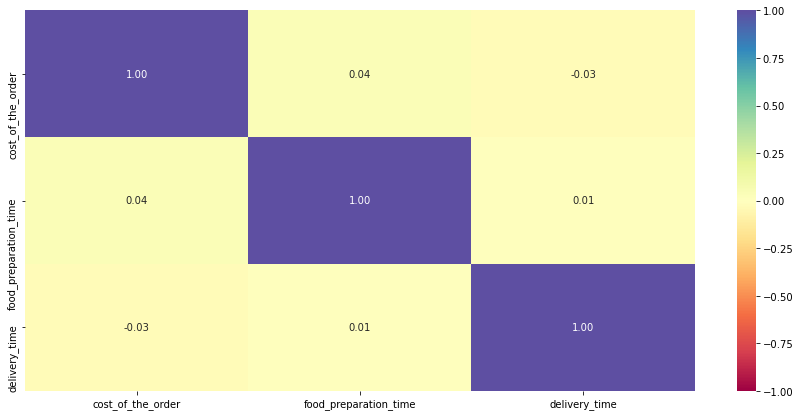

In [45]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**

* Food preperation time has a correlation with cost of order


### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [46]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int64')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [47]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50] ['restaurant_name']## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


**Observations:**
* The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushil all qualify for this offer as they all have average ratings greater than 4
* Of all the restaurants The Meatball Shop has the highest average customer rating

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [48]:
# Add a new column to the dataframe df that stores the company charges
df['foodhub_charge'] =  [order_cost * 0.25 if order_cost > 20 else
                        order_cost * 0.15 if order_cost > 5 else
                        0
                        for order_cost in df['cost_of_the_order']] 

# Get the total revenue and print it
total_rev = df['foodhub_charge'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars') ## Complete the code to round off the total revenue up to 2 decimal places and print it. 

The net revenue is around 6166.3 dollars


**Observations:**
* The company will generate 6166.3 dollars

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [49]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

## Code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
total_orders = df['total_time'].shape[0]
order_greter_60 = df[df['total_time'] > 60].shape[0]
per_orders_greater_than_60 = (order_greter_60/total_orders)*100
print('The percentage of orders that have more than 60 minutes of total delivery time is', round(per_orders_greater_than_60, 2), '%')

The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


**Observations:**
* Only 10.54 percent of orders have a total delivery time over 60 mins 
* So over 89 percent of orders have a total delivery time under 60 minutes



### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [50]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


**Observations:**
* The mean delivery time is 28 minutes on weedays and 22 minutes on weekends

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Key Insights:

**Conclusion**
* The Shake Shack is the most popular restaurant and  has generated the highest revenue of all the 14 restaurants at 3579.53 probably due to high demand of their cuisine and good prices for their menu as well as a reasonable preperation and delivery time
* The delivery time is generally higher on weekdays than on weekends probably due to traffic that riders encounter
* On average an order takes 27 minutes to be prepared and 24 minutes to deliver totalling approximately an hour waiting time and looking at the ratings I can say that customers are generally happy to wait an hour for quality foor
* Most orders are made on a weekend probably because most people are home and not willing to cook themselves after a long week
* Most orders do not have a rating.
* An individual order cost 16.5 dollars on average but can cost up to 35 dollars.
* Food preperation time has a correlation with cost of order as more expensive orders could take longer to prepare
* 89 percent of orders have a total delivery time under 60 minutes
* The Meatball Shop has the highest average customer rating
* American, Japanes, Italian and Chinese cuisine are the most popular
* The highest delivery times are linked to the lowest rating and vise versa
* The highest cost cost of order is linked to the highest rating and viser versa meaning that customers dont mind payinig more for quality food

**Recommendation to the Business**
* American, Japanes, Italian and Chinese cuisine are in high demand so might be worth bringing in more resturants that make these cuisines
* There is a significantly higher number of customers willing to order food on weekends rather than weekdays so more drivers and chefs could be deployed to meet this demand and drive up customer ratings


**Further Analysis**
* The 10.9 percent of orders with total delivery time over 60 minutes need to be analysed further